<a href="https://colab.research.google.com/github/19k41a05g6/project/blob/main/nlp_model_testing_movie_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow_text==2.6.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 4.9 MB/s 
     |████████████████████████████████| 570.3 MB 292 bytes/s 
     |████████████████████████████████| 5.6 MB 38.3 MB/s 
     |████████████████████████████████| 1.3 MB 45.8 MB/s 
     |████████████████████████████████| 14.8 MB 38.6 MB/s 
     |████████████████████████████████| 462 kB 52.4 MB/s 
     |████████████████████████████████| 132 kB 59.2 MB/s 
  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30694 sha256=1e529326a063961bb4f178d14ad40aaecbf1458beb390e13391675106e2a54df
  Stored in directory: /root/.cache/pip/wheels/98/91/04/971b4c587cf47ae952b108949b46926f426c02832d120a082a
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=9491594cbd383184db5423fdd011816f6b180b64e8c95c6de57e521ab075e81d
  Stored in directory: /root/.cache/pip/wheels/3f/e3/ec/8a8336ff196023622fbcb36de0c

In [ ]:
import pandas as pd
from nltk import stopwords
from nltk.stem import SnowballStemmer
from string import punctuation
import re
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text
from numpy import newaxis

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NLP/input.csv',encoding='windows-1254')
df

,tweets
0,yall dont be sad that they never end up togeth...
1,I dont think I can ever recover from this...I ...
2,"JTBC I beg you, more drama/movie/variety show ..."
3,"I don't get it why some people ""hate"" this mas..."
4,theres definitely an inside joke between the t...
5,its really heartbreaking not to see them in an...
6,It sucks that Jisoo's first big acting project...
7,I think international fans need to understand ...
8,I honestly felt like the drama will be cancell...
9,this kdrama was amazing I watched it from begi...


In [ ]:
def text_to_wordlist(text, remove_stopwords=False, stem_words=False):
    text = text.lower().split()
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
    text = " ".join(text)
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    
    if stem_words:
        text = text.split()
        stemmer = SnowballStemmer('english')
        stemmed_words = [stemmer.stem(word) for word in text]
        text = " ".join(stemmed_words)
    
    return(text)

data = df.copy()
data['tweets'] = data['tweets'].apply((lambda x: re.sub('RT ','',x)))
cleanedText = []
for text in data["tweets"].values:
    text = text+" "
    text = re.sub(r'https?:\/\/.*[\r\n]*', ' ', text, flags=re.MULTILINE)
    text = re.sub(r'(@){1}.+?( ){1}', ' ', text, flags=re.MULTILINE)
    text = re.sub(r'(#){1}.+?( ){1}', ' ', text, flags=re.MULTILINE)
    cleanedText.append(text_to_wordlist(text))
data['tweets'] = cleanedText


In [ ]:
module_url = 'https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3'
use = hub.load(module_url)

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/lstm_sentiment_model.h5')

In [ ]:
data2 = data
data2['polarity']=''

In [ ]:
for i in range (0,32):
  text = data2.tweets[i]
  emb_test = use(text)
  emb_test_reshaped = emb_test[:, newaxis, :]
  sentiment_val = (model.predict(emb_test_reshaped) > 0.2).astype('int32')
  if (sentiment_val==1):
     data2.polarity[i]='positive'
  else:
    data2.polarity[i]='negative'


In [ ]:
data2

In [ ]:
sump = data2['polarity'].value_counts()['positive']
sumn = data2['polarity'].value_counts()['negative']

In [ ]:
print('positive:',sump)

print('negative:',sumn)

positive: 25
negative: 7


In [ ]:
rating = (sump)*10.5/(sump+sumn)
rating = round(rating,1)
rating

8.2

             WEB-SERIES RATING :  8.2


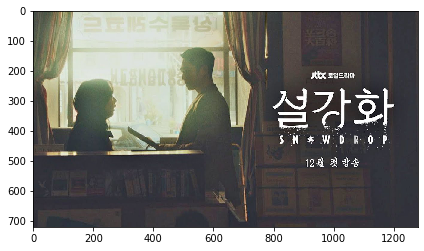

In [ ]:
from skimage import io
img = io.imread('/content/drive/MyDrive/NLP/img.jpg')
io.imshow(img)

print("             WEB-SERIES RATING : ",rating)